<a href="https://colab.research.google.com/github/dhenifferraujo/Machine-Learning/blob/main/Ex3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCC-ICMC-USP - 1o. semestre de 2021
# SCC5871/MAI5025 - APRENDIZADO DE MÁQUINA
# **Exercício 3**

### Profa. Roseli A. F. Romero

### PAE: Guilherme V. Nardari


# Parte 1

O dataset ["Breast Cancer Wisconsin"](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio. Valores ausentes são representados pelo caractere '?'

---


### Questão 01.
Carregue o dataset a partir do arquivo fornecido. Depois conte quantos valores ausentes existem para cada atributo.

In [ ]:
#Libs
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:

dataset_data_path = keras.utils.get_file("breast-cancer-wisconsin.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [ ]:
#Carregando o dataset com id sendo no index

column_names = ['id','clump_thickness','u_cell_size','u_cell_shape',
                'marg_adhesion','epi_cell_size','bare_nuclei',
                'bland_chrom','norm_nucl','mitoses','class']
raw_dataset = pd.read_csv(dataset_data_path, index_col=0, names=column_names,
                      na_values = "?", comment='#', encoding='UTF-8',
                      sep=",", skipinitialspace=True)
#print(raw_dataset.head(5))
dataset_bcw = raw_dataset.copy()
dataset_bcw

,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2.0,1,1,1,2
841769,2,1,1,1,2,1.0,1,1,1,2
888820,5,10,10,3,7,3.0,8,10,2,4


In [ ]:
dataset_bcw.head()

,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
dataset_bcw.dtypes

clump_thickness      int64
u_cell_size          int64
u_cell_shape         int64
marg_adhesion        int64
epi_cell_size        int64
bare_nuclei        float64
bland_chrom          int64
norm_nucl            int64
mitoses              int64
class                int64
dtype: object

In [ ]:
dataset_bcw.keys()

Index(['clump_thickness', 'u_cell_size', 'u_cell_shape', 'marg_adhesion',
       'epi_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucl', 'mitoses',
       'class'],
      dtype='object')

In [ ]:
#Detectando os valores ausentes
dataset_bcw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clump_thickness  699 non-null    int64  
 1   u_cell_size      699 non-null    int64  
 2   u_cell_shape     699 non-null    int64  
 3   marg_adhesion    699 non-null    int64  
 4   epi_cell_size    699 non-null    int64  
 5   bare_nuclei      683 non-null    float64
 6   bland_chrom      699 non-null    int64  
 7   norm_nucl        699 non-null    int64  
 8   mitoses          699 non-null    int64  
 9   class            699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [ ]:
#Aqui estamos retornando o número de valores ausentes para cada coluna
dataset_bcw.isnull().sum()

clump_thickness     0
u_cell_size         0
u_cell_shape        0
marg_adhesion       0
epi_cell_size       0
bare_nuclei        16
bland_chrom         0
norm_nucl           0
mitoses             0
class               0
dtype: int64

In [ ]:
#Retornando o número total de valores ausentes
dataset_bcw.isnull().sum().sum() 

16

In [ ]:
#Porcentagem de valores ausentes

dataset_bcw.isna().mean()

clump_thickness    0.00000
u_cell_size        0.00000
u_cell_shape       0.00000
marg_adhesion      0.00000
epi_cell_size      0.00000
bare_nuclei        0.02289
bland_chrom        0.00000
norm_nucl          0.00000
mitoses            0.00000
class              0.00000
dtype: float64

---
### Questão 02.
Separe o conjunto em $80\%$ treino e $20\%$ teste.

In [ ]:
#separando o target de nosso dataset
x = dataset_bcw.iloc[:,:-1]
y = dataset_bcw.iloc[:,-1:]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

## Questão 03.

Substitua os valores ausentes utilizando a estratégia de média. Utilize a média do conjunto de treinamento para substituir valores faltantes no teste. 

In [ ]:

# #vamos extrair o valor medio do dataset

mean_x_train = x_train['bare_nuclei'].mean()
print(mean_x_train)

x_train = x_train.replace(to_replace=np.NaN, value=mean_x_train, regex=True)
x_test = x_test.replace(to_replace=np.NaN, value=mean_x_train, regex=True)


3.4285714285714284


In [ ]:
x_train.isnull().sum()

clump_thickness    0
u_cell_size        0
u_cell_shape       0
marg_adhesion      0
epi_cell_size      0
bare_nuclei        0
bland_chrom        0
norm_nucl          0
mitoses            0
dtype: int64

In [ ]:
x_test.isnull().sum()

clump_thickness    0
u_cell_size        0
u_cell_shape       0
marg_adhesion      0
epi_cell_size      0
bare_nuclei        0
bland_chrom        0
norm_nucl          0
mitoses            0
dtype: int64

---
### Questão 04.
Treine um Classificador usando o método de Árvore de Decisão (`sklearn.tree.DecisionTreeClassifier`)  no conjunto de treino e extraia a acurácia, precisão e recall no conjunto de teste.

In [ ]:
from sklearn import metrics

model_tree = DecisionTreeClassifier(random_state=0)
#cross_validate(model_tree, x_train, y_train, cv=10, scoring=('accuracy', 'f1_macro'))
model_tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
result = model_tree.predict(x_test)

print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           2       0.94      0.95      0.95        85
           4       0.93      0.91      0.92        55

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



In [ ]:
y_test.shape
x_test.shape

(140, 9)

In [ ]:
model_tree.score(x_test, y_test)

0.9357142857142857

-----
### Questão 05.

Visualize a árvore de decisão resultante (`sklearn.tree.plot_tree`) do treinamento e diga quais são a feature mais informativa. Justifique. 

[Text(974.0948275862069, 1026.8, 'X[1] <= 3.5\ngini = 0.444\nsamples = 100.0%\nvalue = [0.667, 0.333]'),
 Text(533.948275862069, 906.0, 'X[5] <= 5.5\ngini = 0.137\nsamples = 70.1%\nvalue = [0.926, 0.074]'),
 Text(375.2068965517241, 785.2, 'X[7] <= 3.5\ngini = 0.062\nsamples = 66.7%\nvalue = [0.968, 0.032]'),
 Text(230.89655172413794, 664.4, 'X[8] <= 2.5\ngini = 0.022\nsamples = 64.2%\nvalue = [0.989, 0.011]'),
 Text(115.44827586206897, 543.6, 'X[5] <= 3.714\ngini = 0.011\nsamples = 63.5%\nvalue = [0.994, 0.006]'),
 Text(57.724137931034484, 422.79999999999995, 'gini = 0.0\nsamples = 61.2%\nvalue = [1.0, 0.0]'),
 Text(173.17241379310346, 422.79999999999995, 'X[0] <= 5.5\ngini = 0.26\nsamples = 2.3%\nvalue = [0.846, 0.154]'),
 Text(115.44827586206897, 302.0, 'gini = 0.0\nsamples = 2.0%\nvalue = [1.0, 0.0]'),
 Text(230.89655172413794, 302.0, 'gini = 0.0\nsamples = 0.4%\nvalue = [0.0, 1.0]'),
 Text(346.3448275862069, 543.6, 'X[0] <= 4.0\ngini = 0.5\nsamples = 0.7%\nvalue = [0.5, 0.5]'),
 Te

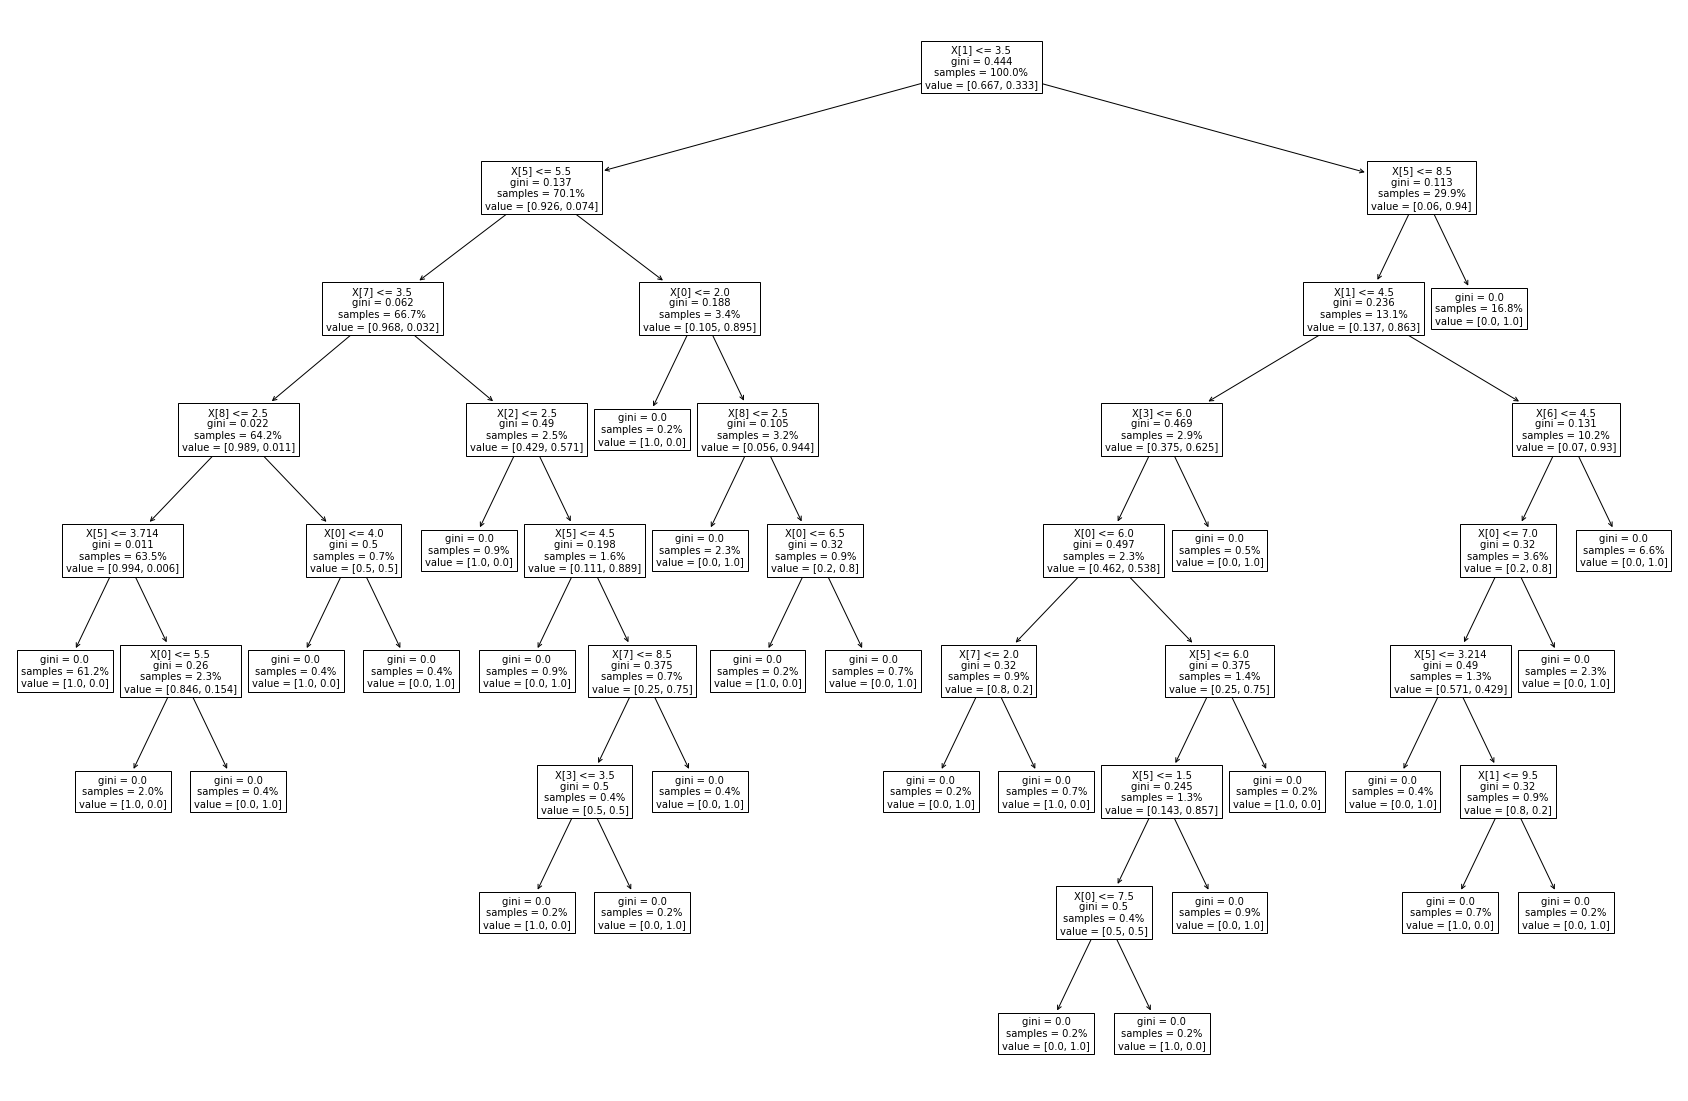

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

plt.figure(figsize=(30,20))
tree.plot_tree(model_tree, proportion=True, fontsize=10)
#plt.show()

In [ ]:
#feature mais informativa
#model_tree.feature_importances_

for feature,importancia in zip(x.columns,model_tree.feature_importances_):
    print("{}: {}".format(feature, importancia))

clump_thickness: 0.05844627447812742
u_cell_size: 0.7236749770565839
u_cell_shape: 0.020463007577078317
marg_adhesion: 0.008212257487964484
epi_cell_size: 0.0
bare_nuclei: 0.1335244157388666
bland_chrom: 0.004184146549313118
norm_nucl: 0.04254209187270101
mitoses: 0.008952829239365053


# Diga quais são a feature mais informativa. Justifique

A feature mais informativa é a u_cell_size: 0.7236749770565839 com 72% de relevância, pois, é nó raiz da árvore de decisão com o atributo que derivou a melhor divisão de conjunto de dados.



-----
# Parte 2

Considere o arquivo `houses_to_rent_v2.csv`. Esta base tem dados de imóveis para 5 cidades do Brasil. Esta base pode ser usada tanto pelo proprietário quanto pelo locatário. Pretende-se que um proprietario
tenha uma estimativa do preço que pode alugar seu imóvel, através de seus atributos. Por outro lado, pretende-se que um locatário possa estimar se o aluguel é condizente.

### Questão 1 
 
 - Separe o conjunto em treinamento (80%) e teste (20%).
 - Verifique se é necessário um preprocessamento nos dados. Justifique o(s) tipo (s) de preprocessamento que foram feitos.
 - Dica: O Sklearn não trabalha com atributos categoricos/nominais na árvore de decisão.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

raw_dataset = pd.read_csv(dataset_data_path, index_col=0, names=column_names,
                      na_values = "?", comment='#', encoding='UTF-8',
                      sep=",", skipinitialspace=True)

data = pd.read_csv('houses_to_rent_v2.csv', na_values='-')
# Vamos ignorar algumas colunas para simplificar o problema
data = data[['city', 'rooms', 'bathroom', 'parking spaces', 'furniture', 'fire insurance (R$)', 'rent amount (R$)']]
data = data.reset_index(drop=True)
print(data.shape[0])
print(data.info())

10692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   rooms                10692 non-null  int64 
 2   bathroom             10692 non-null  int64 
 3   parking spaces       10692 non-null  int64 
 4   furniture            10692 non-null  object
 5   fire insurance (R$)  10692 non-null  int64 
 6   rent amount (R$)     10692 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 584.8+ KB
None


In [ ]:
labels_city = set(data['city'])
labels_furniture = set(data['furniture'].head())

data.head()


,city,rooms,bathroom,parking spaces,furniture,fire insurance (R$),rent amount (R$)
0,São Paulo,2,1,1,furnished,42,3300
1,São Paulo,4,4,0,not furnished,63,4960
2,Porto Alegre,1,1,1,not furnished,41,2800
3,Porto Alegre,2,1,0,not furnished,17,1112
4,São Paulo,1,1,0,not furnished,11,800


In [ ]:
# Seu código começa 
label_encoder1 = LabelEncoder()
data['furniture'] = label_encoder1.fit_transform(data['furniture'])

label_encoder2 = LabelEncoder()
data['city'] = label_encoder2.fit_transform(data['city'])

data.head()

,city,rooms,bathroom,parking spaces,furniture,fire insurance (R$),rent amount (R$)
0,4,2,1,1,0,42,3300
1,4,4,4,0,1,63,4960
2,2,1,1,1,1,41,2800
3,2,2,1,0,1,17,1112
4,4,1,1,0,1,11,800


In [ ]:
print(str(label_encoder1.classes_) + ' -> '  + str(set(data['furniture'].head())))
print(str(label_encoder2.classes_) + ' -> '  + str(set(data['city'])))


['furnished' 'not furnished'] -> {0, 1}
['Belo Horizonte' 'Campinas' 'Porto Alegre' 'Rio de Janeiro' 'São Paulo'] -> {0, 1, 2, 3, 4}


In [ ]:
#separando o target de nosso dataset
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

### Questão 2

Treine um modelo de regressão com o método de Árvore de Decisão (DT), no conjunto de treino e calcule o Mean Squared Error (MSE) e o R2 no conjunto de teste.

- Dica: Utilize `sklearn.tree.DecisionTreeRegressor`

In [ ]:
modeloDTR = tree.DecisionTreeRegressor(random_state=0)

modeloDTR.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:

y_regression = modeloDTR.predict(x_test)


In [ ]:
#A métrica usada para calcular o score é o R2
r2_test = modeloDTR.score(x_test, y_test)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de teste: 0.97


In [ ]:
#Calculando MSE
mse = sqrt(mean_squared_error( y_test, y_regression))

print(mse)

568.2093323148532


### Questão 3

Treine um modelo de regressão com o método Random Forest (RF), no conjunto de treino e calcule o Mean Squared Error (MSE) e o R2 no conjunto de teste.

- Dica: Utilize `sklearn.ensemble.RandomForestRegressor`

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor( random_state=0)

modelRF.fit(x_train, y_train)

#Calculando R2
r2_test = modelRF.score(x_test, y_test)
print('R2 no set de teste: %.2f' % r2_test)

y_modelRFession = modelRF.predict(x_test)

#Calculando MSE
mse = sqrt(mean_squared_error( y_test, y_regression))

print('MSE: %.2f' % mse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


R2 no set de teste: 0.98
MSE: 568.21


In [ ]:
print(str(label_encoder1.classes_) + ' -> '  + str(set(data['furniture'].head())))
print(str(label_encoder2.classes_) + ' -> '  + str(set(data['city'])))

['furnished' 'not furnished'] -> {0, 1}
['Belo Horizonte' 'Campinas' 'Porto Alegre' 'Rio de Janeiro' 'São Paulo'] -> {0, 1, 2, 3, 4}


### Questão 4

Usando o melhor modelo, qual seria a estimativa do valor do aluguel para a cidade de Campinas de um apartamento com 2 dormitórios, 1 banheiro, 1 vaga de garagem, sem mobilia e com seguro de incêndio de 50 reais?

In [ ]:
# campinas, 2, 1, 1, not furnished, 50
# 1, 2, 1, 1, 1, 50
pred_test = np.array([[1, 2, 1, 1, 1, 50]])

result = modelRF.predict(pred_test)
result[0]

3469.1659999999997

In [ ]:
#data['city'] = label_encoder2.inverse_transform(data['city'])
dataset_temp = data.loc[lambda data: data['city'] == 'Campinas']
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['furniture'] == 1]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['rooms'] == 2]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['bathroom'] == 1]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['parking spaces'] == 1]
#dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['fire insurance (R$)'] > 40]
dataset_temp.describe()
#dataset_temp

,city,rooms,bathroom,parking spaces,furniture,fire insurance (R$),rent amount (R$)
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Questão 5

Usando o melhor modelo, qual seria a estimativa do valor do aluguel para a cidade de Porto Alegre de um apartamento com 1 dormitório, 1 banheiro, com 1 vaga de garagem, sem mobilia e seguro de incêndio de 25 reais?



In [ ]:
# Porto Alegre, 1, 1, 1, not furnished, 25
# 2, 1, 1, 1, 1, 25
pred_test = np.array([[2, 1, 1, 1, 1, 25]])

result = modelRF.predict(pred_test)
result[0]

1588.3785714285714

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0)

xgbr.fit(x_train, y_train)


pred_test2 = np.array([[1, 2, 1, 1, 1, 25]])
y_regression2 = xgbr.predict(pred_test2)

mse = sqrt(mean_squared_error( y_test, y_regression2))

print('MSE: '+mse)
print('R2: '+str(xgbr.score(x_test, y_test)))

ValueError: ignored

In [ ]:

dataset_temp = data.loc[lambda data: data['city'] == 'Porto Alegre']
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['furniture'] == 1]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['rooms'] == 1]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['bathroom'] == 1]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['parking spaces'] == 1]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['fire insurance (R$)'] > 20]
dataset_temp = dataset_temp.loc[lambda dataset_temp: dataset_temp['fire insurance (R$)'] < 30]
dataset_temp.describe()
#dataset_temp

,city,rooms,bathroom,parking spaces,furniture,fire insurance (R$),rent amount (R$)
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


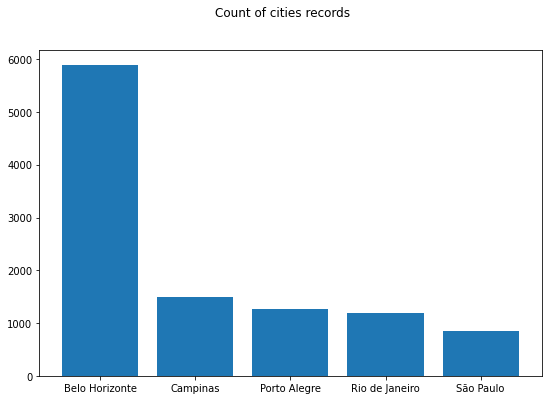

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(list(label_encoder2.classes_), data['city'].value_counts().values)
plt.suptitle('Count of cities records')
plt.show()